# Amazon Product Review Sentiment Analysis

In [52]:
!pip install wordcloud

In [77]:
# necessary imports for the solution
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from nltk import word_tokenize
import string
from nltk.probability import FreqDist
import random
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import copy
from textwrap import wrap
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import seaborn as sns

In [54]:
amazon_reviews_train = pd.read_csv('amazon_reviews_train.csv')
amazon_reviews_test = pd.read_csv('amazon_reviews_test.csv')
# This done to make the basic pre processing for all documents
amazon_reviews = pd.concat([amazon_reviews_train, amazon_reviews_test])

In [14]:
amazon_reviews.head()
amazon_reviews_copy = copy.deepcopy(amazon_reviews)

In [15]:
print(amazon_reviews.shape)
print(amazon_reviews.info())
print(amazon_reviews_copy.isnull().sum())

(51319, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51319 entries, 0 to 2416
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  51319 non-null  object
 1   review     51319 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None
sentiment    0
review       0
dtype: int64


As we can see here, we Don’t have nulls in our rows.

In [16]:
amazon_reviews_copy['sentiment'].value_counts()

positive    39511
negative    11808
Name: sentiment, dtype: int64

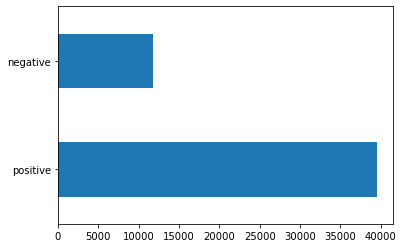

In [22]:
plot=amazon_reviews_copy['sentiment'].value_counts().plot(kind='barh')

This dataset is a little bit unbalanced...

In [24]:
# This stratified sampling is important to guarantee the same class balance in train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(amazon_reviews_copy, test_size = 0.2, stratify=amazon_reviews_copy.sentiment)

In [25]:
train['sentiment'].value_counts()

positive    31609
negative     9446
Name: sentiment, dtype: int64

In [26]:
test['sentiment'].value_counts()

positive    7902
negative    2362
Name: sentiment, dtype: int64

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(train['review'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
#df_dtm.index=df_grouped.index
df_dtm.head(3)

,00,000,000kwh,0099,00am,00pm,01,0100,0143114964,0174,...,zuma,zumba,zupas,zuppa,zwieback,zx,zylitol,zyto,zzzzzzzzzzz,çelem
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Word cloud example

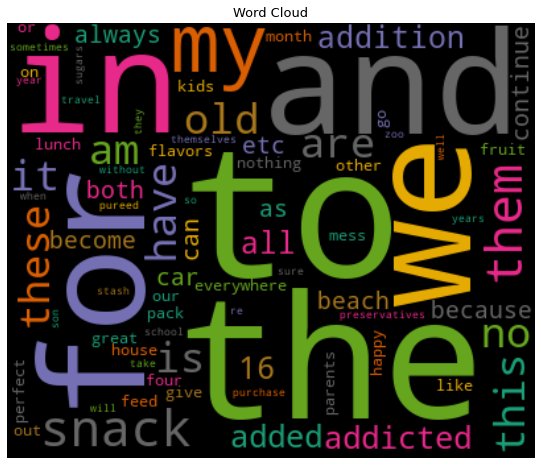

In [45]:
wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(df_dtm.transpose()[0])
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('\n'.join(wrap("Word Cloud",60)),fontsize=13)
plt.show()

## Sentiment Analysis - Text Classification

### Shuffling

Lets shuffle the documents, otherwise they will remain sorted ["neg", "neg" ... "pos"]

In [49]:
#import random
#docnames=train.values
#print(train.values)
#random.shuffle(docnames)

[['positive'
  "We are addicted to these and always have a stash in the house. This (and other flavors) have become our go-to snack. I like them because both my four year old and 16 month old can feed themselves without the mess, so it's perfect for when we are out or on travel. In addition, all this is is pureed fruit - no added sugars, no preservatives, nothing. It's a snack I am happy to give to my kids. We take them everywhere - in the car, to the beach, to the zoo, sometimes I pack them in my son's lunch for school, etc. And they're a great snack for the parents as well... We will continue to purchase these for years I am sure."]
 ['positive'
  'Our 2 dogs, Beagel and Austrailian Cattle Dog, love these chews. Keeps them busy, and cleans their teeth.']
 ['positive'
  'Our 2 dogs, Beagel and Austrailian Cattle Dog, love these chews. Keeps them busy, and cleans their teeth.']
 ...
 ['positive'
  'discovered petit cuisine at winn-dixie-bought 4 can variety pack for my cat tut-he prefe

In [55]:
vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(amazon_reviews_train['review'])
test_X = vectorizer.transform(amazon_reviews_test['review'])
print(train_X.shape, test_X.shape)

(48902, 38505) (2417, 38505)


In [58]:
print(vectorizer.get_feature_names()[2000:2300])

['airpopped', 'airpopper', 'airport', 'airports', 'airpot', 'airships', 'airtight', 'airtightly', 'airway', 'airways', 'airy', 'aisia', 'aisle', 'aisles', 'ajar', 'aji', 'ajika', 'ajinomoto', 'ajitsuke', 'ajowan', 'ajwan', 'ak', 'aka', 'akc', 'akes', 'akg', 'akin', 'akira', 'akita', 'akitas', 'akward', 'al', 'ala', 'alabama', 'alabamians', 'aladdin', 'alafalfa', 'alameed', 'alamosa', 'alan', 'alarm', 'alarmed', 'alarming', 'alas', 'alaska', 'alaskan', 'alays', 'alba', 'albacore', 'albanese', 'albania', 'albanians', 'albany', 'albas', 'albeit', 'albers', 'albersons', 'alberta', 'albertengo', 'albertson', 'albertsons', 'albiet', 'albite', 'albondigas', 'albout', 'album', 'albumin', 'albums', 'albuquerque', 'alcat', 'alcholol', 'alcohol', 'alcoholic', 'alcohols', 'aldi', 'ale', 'alec', 'aleergy', 'aleia', 'aleppo', 'alergec', 'alergic', 'alergies', 'alergy', 'alernative', 'alert', 'alertness', 'ales', 'alessi', 'aleutian', 'aleve', 'alex', 'alexander', 'alexia', 'alf', 'alfalfa', 'alfonso

In [60]:
classifier = MultinomialNB()

In [61]:
classifier.fit(train_X, amazon_reviews_train['sentiment'])

MultinomialNB()

In [62]:
pred = classifier.predict(test_X)

In [64]:
score = sklearn.metrics.accuracy_score(amazon_reviews_test['sentiment'], pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.852


In [82]:
lr = LogisticRegression(solver = 'liblinear', random_state = 100, max_iter=10000)
lr.fit(train_X,amazon_reviews_train['sentiment'])
y_pred = lr.predict(test_X)
y_true=amazon_reviews_test['sentiment']
score = round(metrics.accuracy_score(y_true,y_pred),3)
print("Accuracy: ",score)

Accuracy:  0.867


In [83]:
cm = metrics.confusion_matrix(y_true, y_pred)
print(cm)

[[ 534  207]
 [ 115 1561]]


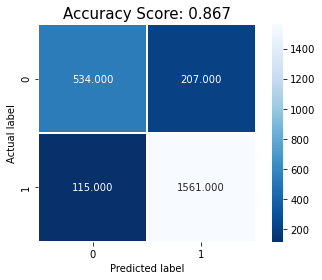

In [84]:
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [86]:
from imblearn.over_sampling import SMOTE
x_resampled, y_resampled = SMOTE().fit_resample(train_X, amazon_reviews_train['sentiment'])

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='buy'>

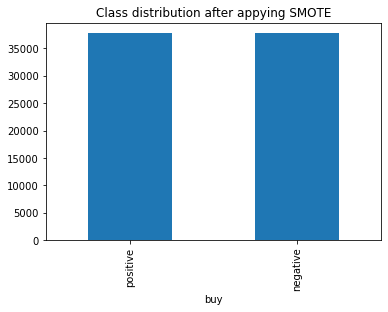

In [87]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='buy')

In [88]:
lr = LogisticRegression(solver = 'liblinear', random_state = 100, max_iter=10000)
lr.fit(x_resampled,y_resampled)
y_pred = lr.predict(test_X)
y_true=amazon_reviews_test['sentiment']
score = round(metrics.accuracy_score(y_true,y_pred),3)
print("Accuracy: ",score)

Accuracy:  0.846
